# Cervical Cancer Biopsy Result Classification using Support Vector Machine 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/kag_risk_factors_cervical_cancer.csv')

In [ ]:
#replace missing value with np.nan
dataset = dataset.replace('?', np.nan)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [ ]:
#convert columns with string value to numeric value
for col in list(dataset.columns):
  dataset[col] = pd.to_numeric(dataset[col])

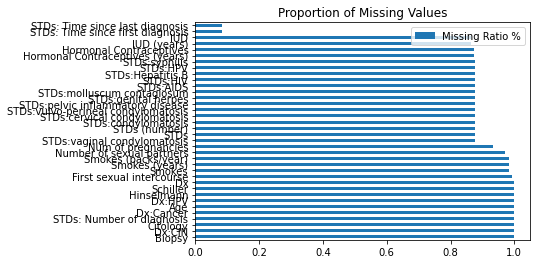

In [ ]:
#get the proportion of missing values 
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = 1 - (df.isnull().sum() / len(df))    
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", title='Proportion of Missing Values')
        plt.show()
    else:
        print('No NAs found')
plot_nas(dataset)

In [ ]:
#attributes or independent variables that has more than 15% missing data will be removed
not_important_attributes = [] 
for col in list(dataset.columns):
  if ((dataset[col].isnull().sum()/len(dataset))*100)<85:
    continue
  else:
    not_important_attributes.append(col)


#####  After checking the number null or nan values in our dataframe we notice that column 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' has a lot of missing data. We can drop this columns because these will not give enough information for the classifier.

In [ ]:
dataset = dataset.drop(columns=not_important_attributes) #remove columns with a lot of missing data


In [ ]:
cols = dataset.columns

# numeiral and
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

In [ ]:
dataset_copy = dataset.copy()

In [ ]:
# independent variables
X = dataset.iloc[:, :-1].values

# dependent variable
y = dataset.iloc[:, -1].values

##### To overcome the issue of having too many missing data points, we can use imputation after splitting. 

# Suppor Vector Machine using 80/20 dataset split ratio, utilizing either mean or mode for missing continuous value and used mode to assign missing value for missing categorical value.

In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
def playsvc(pKernel):
    SVclassifier = SVC(kernel = pKernel, random_state = 0)
    SVclassifier.fit(X_train, y_train)
    # Predicting the Test set results
    return SVclassifier.predict(X_test)


In [ ]:
#splitting the dataset into train set and test set.
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#imputing missing value with either mean or median for numerical (or continuous) and mode for categorical of the feature after splitting the dataset


X_train_df = pd.DataFrame(X_train)
X_train_df.columns = cols[:-1]

for col in list(X_train_df.columns):
  if col not in categorical_df:
    imputed_val = X_train_df[col].median()
    X_train_df[col].fillna(imputed_val,inplace=True)
  else:
    X_train_df[col].fillna(X_train_df[col].mode()[0],inplace=True)

y_train_df = pd.DataFrame(y_train)



for col in list(y_train_df.columns):
  if col not in categorical_df:
    imputed_val = y_train_df[col].median()
    y_train_df[col].fillna(imputed_val,inplace=True)
  else:
    y_train_df[col].fillna(y_train_df[col].mode()[0],inplace=True)

X_test_df = pd.DataFrame(X_test)
X_test_df .columns = cols[:-1]


for col in list(X_test_df.columns):
  if col not in categorical_df:
    imputed_val = X_test_df[col].median()
    X_test_df[col].fillna(imputed_val,inplace=True)
  else:
    X_test_df[col].fillna(X_test_df[col].mode()[0],inplace=True)


y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['Biopsy']

for col in list(y_test_df.columns):
  if col not in categorical_df:
    imputed_val = y_test_df[col].median()
    y_test_df[col].fillna(imputed_val,inplace=True)
  else:
    y_test_df[col].fillna(y_test_df[col].mode()[0],inplace=True)

#Normalizing the valeus to help models easily spot the simalarities and difference
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler()
X_train = scaled_X.fit_transform(X_train)
X_test = scaled_X.transform(X_test)


#linear, rbf, poly kernels for SVM
y_predLin = playsvc('linear')
y_predRBF = playsvc('rbf')
y_predPoly = playsvc('poly')

#Using F1-Score
from sklearn.metrics import f1_score
F1_scores_median_mode = []
scoreLin = f1_score(y_test, y_predLin, average='binary')
scoreRBF = f1_score(y_test, y_predRBF, average='binary')
scorePoly = f1_score(y_test, y_predPoly, average='binary')

F1_scores_median_mode.append(scoreLin)
F1_scores_median_mode.append(scoreRBF)
F1_scores_median_mode.append(scorePoly)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


# Accuracy of the Model with linear Kernel 
print("Accuracy:",metrics.accuracy_score(y_test, y_predLin))

# Precision of the Model with linear Kernel
print("Precision:",metrics.precision_score(y_test, y_predLin))

# Recall of the Model with linear Kernel
print("Recall:",metrics.recall_score(y_test, y_predLin))

Accuracy: 0.9651162790697675
Precision: 0.625
Recall: 0.625


In [ ]:
#splitting the dataset into train set and test set.
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#imputing missing value with either mean or median for numerical (or continuous) and mode for categorical of the feature after splitting the dataset

X_train_df = pd.DataFrame(X_train)
X_train_df.columns = cols[:-1]

for col in list(X_train_df.columns):
  if col not in categorical_df:
    imputed_val = X_train_df[col].mean() #notice that we change median to mean here.
    X_train_df[col].fillna(imputed_val,inplace=True)
  else:
    X_train_df[col].fillna(X_train_df[col].mode()[0],inplace=True)

y_train_df = pd.DataFrame(y_train)



for col in list(y_train_df.columns):
  if col not in categorical_df:
    imputed_val = y_train_df[col].mean() #notice that we change median to mean here.
    y_train_df[col].fillna(imputed_val,inplace=True)
  else:
    y_train_df[col].fillna(y_train_df[col].mode()[0],inplace=True)

X_test_df = pd.DataFrame(X_test)
X_test_df .columns = cols[:-1]


for col in list(X_test_df.columns):
  if col not in categorical_df:
    imputed_val = X_test_df[col].mean() #notice that we change median to mean here.
    X_test_df[col].fillna(imputed_val,inplace=True)
  else:
    X_test_df[col].fillna(X_test_df[col].mode()[0],inplace=True)


y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['Biopsy']

for col in list(y_test_df.columns):
  if col not in categorical_df:
    imputed_val = y_test_df[col].mean() #notice that we change median to mean here.
    y_test_df[col].fillna(imputed_val,inplace=True)
  else:
    y_test_df[col].fillna(y_test_df[col].mode()[0],inplace=True)

#Normalizing the valeus to help models easily spot the simalarities and difference
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler()
X_train = scaled_X.fit_transform(X_train)
X_test = scaled_X.transform(X_test)

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
def playsvc(pKernel):
    SVclassifier = SVC(kernel = pKernel, random_state = 0)
    SVclassifier.fit(X_train, y_train)
    # Predicting the Test set results
    return SVclassifier.predict(X_test)


#linear, rbf, poly kernels for SVM
y_predLin = playsvc('linear')
y_predRBF = playsvc('rbf')
y_predPoly = playsvc('poly')


#Using F1-Score
from sklearn.metrics import f1_score
F1_scores_mean_mode = []
scoreLin = f1_score(y_test, y_predLin, average='binary')
scoreRBF = f1_score(y_test, y_predRBF, average='binary')
scorePoly = f1_score(y_test, y_predPoly, average='binary')

F1_scores_mean_mode.append(scoreLin)
F1_scores_mean_mode.append(scoreRBF)
F1_scores_mean_mode.append(scorePoly)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print('Accuracy, Precision and Recall of SVM with Linear Kernel, 80/20 dataset ratio split and imputing mean for missing continuous values and mode for missing categorical values ')
# Accuracy of the Model with linear Kernel 
print("Accuracy:",metrics.accuracy_score(y_test, y_predLin))

# Precision of the Model with linear Kernel
print("Precision:",metrics.precision_score(y_test, y_predLin))

# Recall of the Model with linear Kernel
print("Recall:",metrics.recall_score(y_test, y_predLin))

Accuracy, Precision and Recall of SVM with Linear Kernel, 80/20 dataset ratio split and imputing mean for missing continuous values and mode for missing categorical values 
Accuracy: 0.9534883720930233
Precision: 0.5
Recall: 0.5


In [ ]:
table1 = pd.DataFrame(list(zip(F1_scores_median_mode,F1_scores_mean_mode)),columns=['F1-score using Median and Mode','F1 -core using Mean and Mode'],index = ['scoreLin','scoreRBF','scorePoly'])
table1 = table1.style.set_caption('Table 1. Using 80/20 Dataset Split Ratio in Different Imputation Techniques')
table1

,F1-score using Median and Mode,F1 -core using Mean and Mode
scoreLin,0.625000,0.500000
scoreRBF,0.181818,0.181818
scorePoly,0.363636,0.363636


##### We can notice that the evaluation metrics are still the same. Thus, in this type of dataset, it doesn't matter if you impute the mean or median on missing continuous values. The potential reason for this unchanged metric result is that the mean and median of the continuous are similar or almost the same. But dataset split ratio affects the performance of the model, we can see that in this case 70/30 is provides a better performance than 80/20.



# Suppor Vector Machine using 70/30 dataset split ratio, utilizing either mean or mode for missing continuous value and used mode to assign missing value for missing categorical value.

In [ ]:
#splitting the dataset into train set and test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.3,random_state=0)
# X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#imputing missing value with either mean or median for numerical (or continuous) and mode for categorical of the feature after splitting the dataset


X_train_df = pd.DataFrame(X_train)
X_train_df.columns = cols[:-1]

for col in list(X_train_df.columns):
  if col not in categorical_df:
    imputed_val = X_train_df[col].median()
    X_train_df[col].fillna(imputed_val,inplace=True)
  else:
    X_train_df[col].fillna(X_train_df[col].mode()[0],inplace=True)

y_train_df = pd.DataFrame(y_train)



for col in list(y_train_df.columns):
  if col not in categorical_df:
    imputed_val = y_train_df[col].median()
    y_train_df[col].fillna(imputed_val,inplace=True)
  else:
    y_train_df[col].fillna(y_train_df[col].mode()[0],inplace=True)

X_test_df = pd.DataFrame(X_test)
X_test_df .columns = cols[:-1]


for col in list(X_test_df.columns):
  if col not in categorical_df:
    imputed_val = X_test_df[col].median()
    X_test_df[col].fillna(imputed_val,inplace=True)
  else:
    X_test_df[col].fillna(X_test_df[col].mode()[0],inplace=True)


y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['Biopsy']

for col in list(y_test_df.columns):
  if col not in categorical_df:
    imputed_val = y_test_df[col].median()
    y_test_df[col].fillna(imputed_val,inplace=True)
  else:
    y_test_df[col].fillna(y_test_df[col].mode()[0],inplace=True)

#Normalizing the valeus to help models easily spot the simalarities and difference
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler()
X_train = scaled_X.fit_transform(X_train)
X_test = scaled_X.transform(X_test)


#linear, rbf, poly kernels for SVM
y_predLin = playsvc('linear')
y_predRBF = playsvc('rbf')
y_predPoly = playsvc('poly')

#Using F1-Score
from sklearn.metrics import f1_score
F1_scores_median_mode = []
scoreLin = f1_score(y_test, y_predLin, average='binary')
scoreRBF = f1_score(y_test, y_predRBF, average='binary')
scorePoly = f1_score(y_test, y_predPoly, average='binary')

F1_scores_median_mode.append(scoreLin)
F1_scores_median_mode.append(scoreRBF)
F1_scores_median_mode.append(scorePoly)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


# Accuracy of the Model with linear Kernel 
print("Accuracy:",metrics.accuracy_score(y_test, y_predLin))

# Precision of the Model with linear Kernel
print("Precision:",metrics.precision_score(y_test, y_predLin))

# Recall of the Model with linear Kernel
print("Recall:",metrics.recall_score(y_test, y_predLin))

Accuracy: 0.9728682170542635
Precision: 0.6875
Recall: 0.8461538461538461


In [ ]:
#splitting the dataset into train set and test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.3,random_state=0)
# X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#imputing missing value with either mean or median for numerical (or continuous) and mode for categorical of the feature after splitting the dataset


X_train_df = pd.DataFrame(X_train)
X_train_df.columns = cols[:-1]

for col in list(X_train_df.columns):
  if col not in categorical_df:
    imputed_val = X_train_df[col].mean()
    X_train_df[col].fillna(imputed_val,inplace=True)
  else:
    X_train_df[col].fillna(X_train_df[col].mode()[0],inplace=True)

y_train_df = pd.DataFrame(y_train)



for col in list(y_train_df.columns):
  if col not in categorical_df:
    imputed_val = y_train_df[col].mean()
    y_train_df[col].fillna(imputed_val,inplace=True)
  else:
    y_train_df[col].fillna(y_train_df[col].mode()[0],inplace=True)

X_test_df = pd.DataFrame(X_test)
X_test_df .columns = cols[:-1]


for col in list(X_test_df.columns):
  if col not in categorical_df:
    imputed_val = X_test_df[col].mean()
    X_test_df[col].fillna(imputed_val,inplace=True)
  else:
    X_test_df[col].fillna(X_test_df[col].mode()[0],inplace=True)


y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['Biopsy']

for col in list(y_test_df.columns):
  if col not in categorical_df:
    imputed_val = y_test_df[col].mean()
    y_test_df[col].fillna(imputed_val,inplace=True)
  else:
    y_test_df[col].fillna(y_test_df[col].mode()[0],inplace=True)

#Normalizing the valeus to help models easily spot the simalarities and difference
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler()
X_train = scaled_X.fit_transform(X_train)
X_test = scaled_X.transform(X_test)


#linear, rbf, poly kernels for SVM
y_predLin = playsvc('linear')
y_predRBF = playsvc('rbf')
y_predPoly = playsvc('poly')

#Using F1-Score
from sklearn.metrics import f1_score
F1_scores_median_mode = []
scoreLin = f1_score(y_test, y_predLin, average='binary')
scoreRBF = f1_score(y_test, y_predRBF, average='binary')
scorePoly = f1_score(y_test, y_predPoly, average='binary')

F1_scores_median_mode.append(scoreLin)
F1_scores_median_mode.append(scoreRBF)
F1_scores_median_mode.append(scorePoly)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


# Accuracy of the Model with linear Kernel 
print("Accuracy:",metrics.accuracy_score(y_test, y_predLin))

# Precision of the Model with linear Kernel
print("Precision:",metrics.precision_score(y_test, y_predLin))

# Recall of the Model with linear Kernel
print("Recall:",metrics.recall_score(y_test, y_predLin))

Accuracy: 0.9728682170542635
Precision: 0.6875
Recall: 0.8461538461538461


In [ ]:
table2 = pd.DataFrame(list(zip(F1_scores_median_mode,F1_scores_mean_mode)),columns=['F1-score using Median and Mode','F1 -core using Mean and Mode'],index = ['scoreLin','scoreRBF','scorePoly'])

table2 = table2.style.set_caption('Table 2. Using 70/30 Dataset Split Ratio in Different Imputation Techniques')
table2

,F1-score using Median and Mode,F1 -core using Mean and Mode
scoreLin,0.758621,0.500000
scoreRBF,0.500000,0.181818
scorePoly,0.476190,0.363636


# Conclusion

<div style="text-align: right">Based on table 1, which contains the evaluation of the SVM model that uses an 80/20 split ratio with various methods of imputing missing values, the lowest f1-score is 18.18 percent and the highest is around 62.50 percent, demonstrating that the Linear Kernel is the best suitable kernel of the Support Vector Machine used in this case and imputing continuous missing value with mean results the highest f1-score. And, as shown in table 2, which contains the evaluation of the SVM model that uses a 70/30 split ratio with various methods of imputing missing values, the lowest f1-score is 18.18 percent and the highest is around 75.86 percent, demonstrating that the Linear Kernel is the best suitable kernel of the Support Vector Machine used in this case and  imputing the median to a missing numerical or continuous value improves the SVM classifier's performance. Thus, the dataset split ratio, the kind of kernel used in SVM, and the value imputed if missing values exist all have an effect on the accuracy or overall performance of the SVM classifier.</div>